In [ ]:
# !pip install --upgrade pip --user
# !pip install -r requirements --user

# Importação dos Dados

In [24]:
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime, date, timedelta

In [51]:
X_train = pd.read_csv("Dados/final_Xtrain.csv", parse_dates=["datehour"]).set_index("datehour").asfreq("H")

In [54]:
X_test = pd.read_csv("Dados/final_Xtest.csv", parse_dates=["datehour"]).set_index("datehour").asfreq("H")

In [56]:
y_train = pd.read_csv("Dados/final_Ytrain.csv", parse_dates=["datehour"]).set_index("datehour").asfreq("H")

In [57]:
y_test = pd.read_csv("Dados/final_Ytest.csv", parse_dates=["datehour"]).set_index("datehour").asfreq("H")

In [58]:
X_train.tail()

const    trend  s(2,24)  s(3,24)  s(4,24)  s(5,24)  \
datehour                                                                  
2018-12-31 19:00:00    1.0  17516.0      0.0      0.0      0.0      0.0   
2018-12-31 20:00:00    1.0  17517.0      0.0      0.0      0.0      0.0   
2018-12-31 21:00:00    1.0  17518.0      0.0      0.0      0.0      0.0   
2018-12-31 22:00:00    1.0  17519.0      0.0      0.0      0.0      0.0   
2018-12-31 23:00:00    1.0  17520.0      0.0      0.0      0.0      0.0   

                     s(6,24)  s(7,24)  s(9,24)  s(10,24)  ...  isholiday  \
datehour                                                  ...              
2018-12-31 19:00:00      0.0      0.0      0.0       0.0  ...      False   
2018-12-31 20:00:00      0.0      0.0      0.0       0.0  ...      False   
2018-12-31 21:00:00      0.0      0.0      0.0       0.0  ...      False   
2018-12-31 22:00:00      0.0      0.0      0.0       0.0  ...      False   
2018-12-31 23:00:00      0.0      0.0      0.0       0.0  ...      False   

                     isnearholiday  isweekend    ma_total  TAVG  TMAX  TMIN  \
datehour                                                                      
2018-12-31 19:00:00           True      False  726.833333  42.0  48.0  36.0   
2018-12-31 20:00:00           True      False  683.733333  42.0  48.0  36.0   
2018-12-31 21:00:00           True      False  636.566667  42.0  48.0  36.0   
2018-12-31 22:00:00           True      False  594.433333  42.0  48.0  36.0   
2018-12-31 23:00:00           True      False  557.466667  42.0  48.0  36.0   

                     PRCP  SNOW  SNWD  
datehour                               
2018-12-31 19:00:00  1.02   0.0   0.0  
2018-12-31 20:00:00  1.02   0.0   0.0  
2018-12-31 21:00:00  1.02   0.0   0.0  
2018-12-31 22:00:00  1.02   0.0   0.0  
2018-12-31 23:00:00  1.02   0.0   0.0  

[5 rows x 763 columns]

In [59]:
X_test.tail()

const    trend  s(2,24)  s(3,24)  s(4,24)  s(5,24)  \
datehour                                                                  
2019-12-31 19:00:00    1.0  26276.0      0.0      0.0      0.0      0.0   
2019-12-31 20:00:00    1.0  26277.0      0.0      0.0      0.0      0.0   
2019-12-31 21:00:00    1.0  26278.0      0.0      0.0      0.0      0.0   
2019-12-31 22:00:00    1.0  26279.0      0.0      0.0      0.0      0.0   
2019-12-31 23:00:00    1.0  26280.0      0.0      0.0      0.0      0.0   

                     s(6,24)  s(7,24)  s(9,24)  s(10,24)  ...  isholiday  \
datehour                                                  ...              
2019-12-31 19:00:00      0.0      0.0      0.0       0.0  ...      False   
2019-12-31 20:00:00      0.0      0.0      0.0       0.0  ...      False   
2019-12-31 21:00:00      0.0      0.0      0.0       0.0  ...      False   
2019-12-31 22:00:00      0.0      0.0      0.0       0.0  ...      False   
2019-12-31 23:00:00      0.0      0.0      0.0       0.0  ...      False   

                     isnearholiday  isweekend    ma_total  TAVG  TMAX  TMIN  \
datehour                                                                      
2019-12-31 19:00:00          False      False  846.200000  40.5  45.0  36.0   
2019-12-31 20:00:00          False      False  848.900000  40.5  45.0  36.0   
2019-12-31 21:00:00          False      False  847.200000  40.5  45.0  36.0   
2019-12-31 22:00:00          False      False  849.033333  40.5  45.0  36.0   
2019-12-31 23:00:00          False      False  837.600000  40.5  45.0  36.0   

                     PRCP  SNOW  SNWD  
datehour                               
2019-12-31 19:00:00  0.02   0.0   0.0  
2019-12-31 20:00:00  0.02   0.0   0.0  
2019-12-31 21:00:00  0.02   0.0   0.0  
2019-12-31 22:00:00  0.02   0.0   0.0  
2019-12-31 23:00:00  0.02   0.0   0.0  

[5 rows x 763 columns]

In [60]:
y_train.tail()

total
datehour                  
2018-12-31 19:00:00  102.0
2018-12-31 20:00:00  133.0
2018-12-31 21:00:00   61.0
2018-12-31 22:00:00   73.0
2018-12-31 23:00:00   48.0

In [61]:
y_test.tail()

total
datehour                  
2019-12-31 19:00:00  782.0
2019-12-31 20:00:00  505.0
2019-12-31 21:00:00  386.0
2019-12-31 22:00:00  390.0
2019-12-31 23:00:00  291.0

# Códigos

## Métricas

In [62]:
from sklearn import metrics
import math

def print_metrics(y_test, y_pred):
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    mape = metrics.mean_absolute_percentage_error(y_test, y_pred)
    mae = metrics.median_absolute_error(y_test, y_pred)

    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAPE:", mape)
    print("MAE:", mae)

# Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
modelo = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
y_pred = pd.Series(modelo.predict(X_test), index=X_test.index)

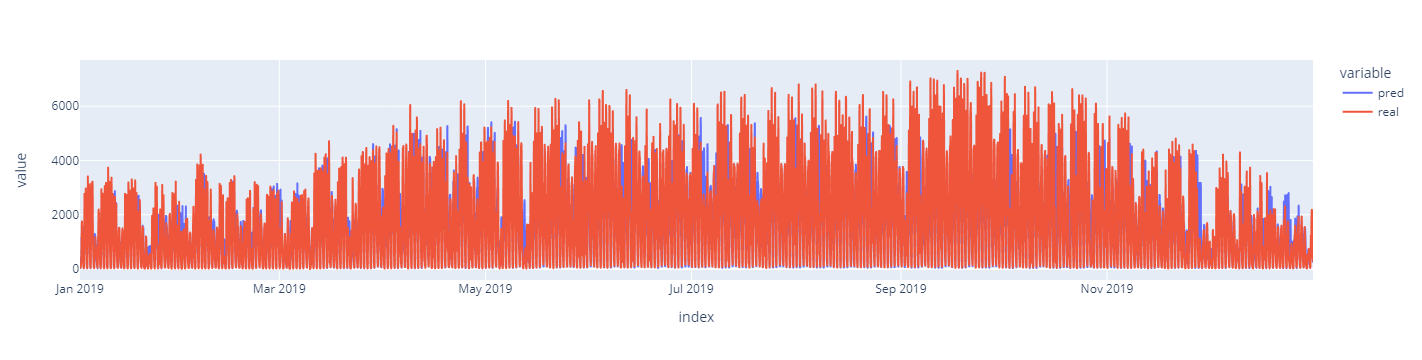

In [320]:
px.line(
    pd.DataFrame({
        "pred": y_pred,
        "real": y_test
    })
)

In [330]:
print_metrics(y_test, y_pred)

MSE: 302107.03066628997
RMSE: 549.6426390540403
MAPE: 62073586644830.65
MAE: 173.97000000000003


# Linear Regression

In [331]:
from sklearn.linear_model import LinearRegression

In [332]:
modelo = LinearRegression(fit_intercept=False).fit(X_train, y_train)

In [334]:
y_pred = pd.Series(modelo.predict(X_test), index=X_test.index)

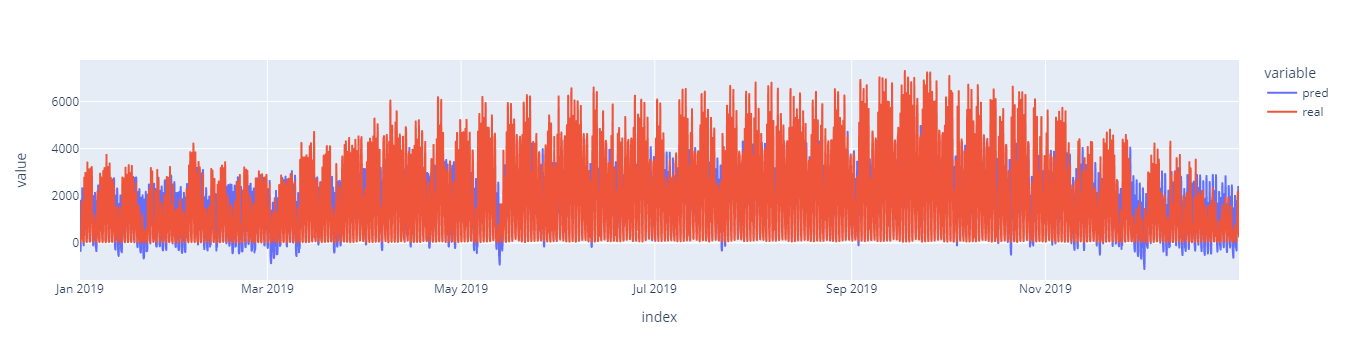

In [335]:
px.line(
    pd.DataFrame({
        "pred": y_pred,
        "real": y_test
    })
)

In [336]:
print_metrics(y_test, y_pred)

MSE: 599543.1131786894
RMSE: 774.3016939014724
MAPE: 264305361073570.25
MAE: 422.93305264952494


# XGBoost

In [337]:
import xgboost as xgb

In [360]:
split_index = int(len(X_train) * 0.7)

X_train_2 = X_train[:split_index]
y_train_2 = y_train[:split_index]
X_val_2 = X_train[split_index:]
y_val_2 = y_train[split_index:]

In [361]:
modelo = xgb.XGBRegressor(n_estimators=50).fit(X_train_2, y_train_2, eval_set=[(X_val_2, y_val_2)], verbose=True)

[0]	validation_0-rmse:1575.49821
[1]	validation_0-rmse:1203.32066
[2]	validation_0-rmse:931.26058
[3]	validation_0-rmse:774.97346
[4]	validation_0-rmse:658.47257
[5]	validation_0-rmse:581.17074
[6]	validation_0-rmse:541.73491
[7]	validation_0-rmse:509.13795
[8]	validation_0-rmse:501.52774
[9]	validation_0-rmse:490.65408
[10]	validation_0-rmse:474.94291
[11]	validation_0-rmse:466.14830
[12]	validation_0-rmse:462.99981
[13]	validation_0-rmse:456.57871
[14]	validation_0-rmse:457.65519
[15]	validation_0-rmse:457.11302
[16]	validation_0-rmse:456.30655
[17]	validation_0-rmse:454.24568
[18]	validation_0-rmse:455.04769
[19]	validation_0-rmse:451.44733
[20]	validation_0-rmse:450.92383
[21]	validation_0-rmse:452.49737
[22]	validation_0-rmse:453.75309
[23]	validation_0-rmse:454.22723
[24]	validation_0-rmse:456.25361
[25]	validation_0-rmse:457.39540
[26]	validation_0-rmse:457.69396
[27]	validation_0-rmse:458.19269
[28]	validation_0-rmse:459.23000
[29]	validation_0-rmse:459.25009
[30]	validation_0-

In [365]:
y_pred = pd.Series(modelo.predict(X_test), index=X_test.index)

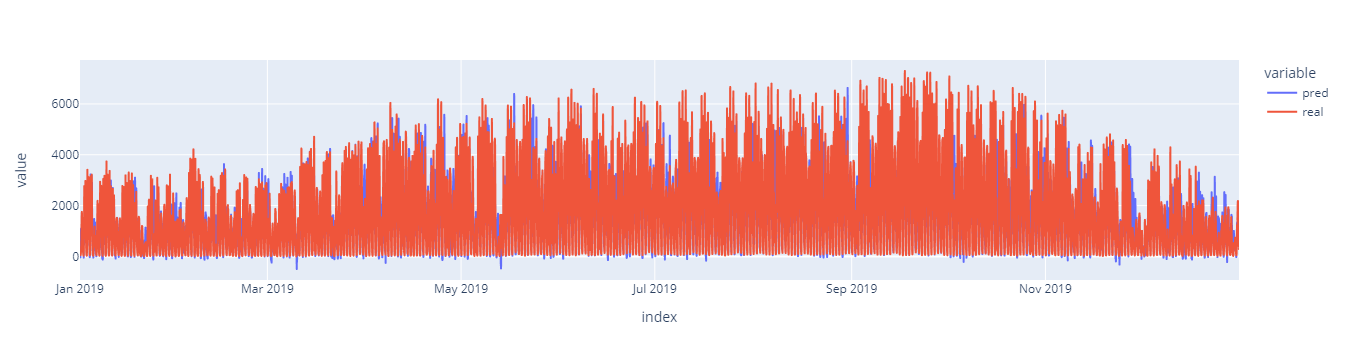

In [366]:
px.line(
    pd.DataFrame({
        "pred": y_pred,
        "real": y_test
    })
)

In [367]:
print_metrics(y_test, y_pred)

MSE: 343739.85553161654
RMSE: 586.2933186823951
MAPE: 110580228398543.45
MAE: 224.0388045310974


# LSTM

In [69]:
from keras.preprocessing import sequence 
from keras.models import Sequential 
from keras.layers import Dense, Embedding 
from keras.layers import LSTM 

In [368]:
split_index = int(len(X_train) * 0.7)

X_train_2 = X_train[:split_index]
y_train_2 = y_train[:split_index]
X_val_2 = X_train[split_index:]
y_val_2 = y_train[split_index:]

In [79]:
input_len = len(X_test.columns)
input_len

763

In [87]:
# testando

# reshape input to be 3D [samples, timesteps, features]

split_index = int(len(X_train) * 0.7)

X_train_2 = X_train[:split_index]
y_train_2 = y_train_reframed[:split_index]
X_val_2 = X_train[split_index:]
y_val_2 = y_train_reframed[split_index:]

train_X = X_train_2.values.reshape((X_train_2.shape[0], 1, X_train_2.shape[1]))
val_X = X_val_2.values.reshape((X_val_2.shape[0], 1, X_val_2.shape[1]))

print(train_X.shape, y_train_2.shape, val_X.shape, y_val_2.shape)

(12264, 1, 763) (12264, 6) (5256, 1, 763) (5251, 6)


In [ ]:

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)

In [81]:
# testando

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_2.shape[1], X_train_2.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(X_train_2, y_train_2, epochs=50, batch_size=72, validation_data=(X_val_2, y_val_2), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

IndexError: tuple index out of range

In [429]:
model = Sequential() 
model.add(LSTM(input_len, dropout = 0.2, recurrent_dropout = 0.2)) 
model.add(Dense(1, activation = 'sigmoid'))

In [430]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [431]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [432]:
X_train_2.astype(float).shape

(12264, 763)

In [433]:
y_train_2.astype(float).shape

(12264,)

In [434]:
X_val_2.astype(float).shape

(5256, 763)

In [435]:
y_val_2.astype(float).shape

(5256,)

In [452]:
y_train_2.values.reshape(-1, 1, 1).shape

(12264, 1, 1)

In [445]:
print('Input shape:', X_train_2.iloc[0].shape)
print('Output shape:', model(X_train_2.iloc[0]).shape)

Input shape: (763,)


ValueError: Input 0 of layer sequential_11 is incompatible with the layer: expected ndim=3, found ndim=1. Full shape received: (763,)

In [450]:
model.fit(
   X_train_2.astype(float).values.reshape(-1, 1, input_len), y_train_2.astype(float).values.reshape(-1, 1, 1), 
   batch_size = 32, 
   epochs = 15, 
   validation_data = (X_val_2.astype(float).values.reshape(-1, 1, input_len), y_val_2.astype(float).values.reshape(-1, 1, 1))
)

Epoch 1/15


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [339]:
y_pred = pd.Series(modelo.predict(X_test), index=X_test.index)

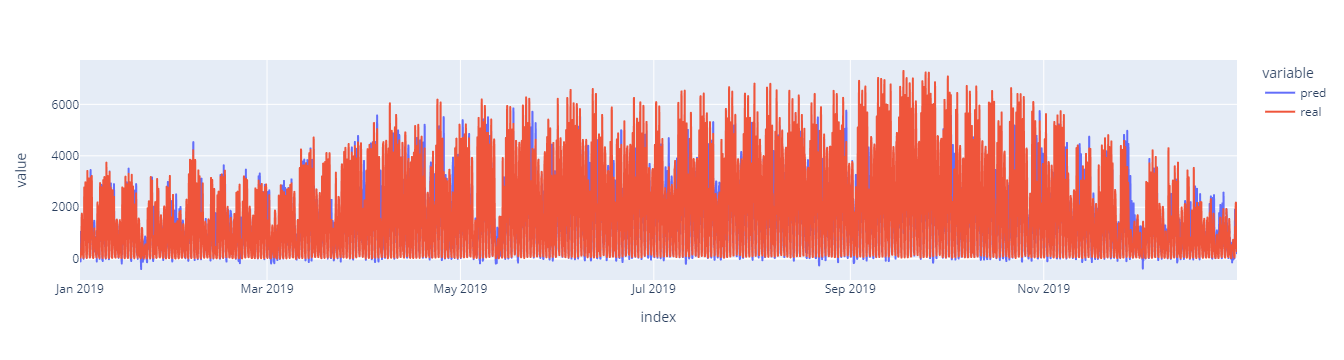

In [340]:
px.line(
    pd.DataFrame({
        "pred": y_pred,
        "real": y_test
    })
)

In [341]:
print_metrics(y_test, y_pred)

MSE: 285283.5496858108
RMSE: 534.1194151927177
MAPE: 77541182668201.94
MAE: 194.21389770507812


# Métricas